In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Load, change target and split data
df = pd.read_csv('indian_liver_patient_preprocessed.csv')

In [11]:
#Split data on data and target
X = df.drop(columns='Liver_disease')
y = df.Liver_disease
#Import libraries for preprocessing
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 1 )

In [12]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

65.5% accuracy on test set vs. 88.1% on training set


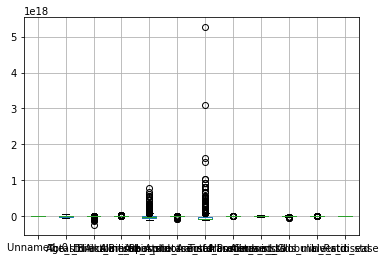

In [16]:

# Normalize the data
normalized_df = df / df.mean()

normalized_df.boxplot()
plt.show()

In [17]:
# Print the variances of the normalized data
print(normalized_df.var())

Unnamed: 0                        3.365490e-01
Age_std                           2.745783e+32
Total_Bilirubin_std               4.671465e+32
Direct_Bilirubin_std              3.344976e+31
Alkaline_Phosphotase_std          1.068328e+34
Alamine_Aminotransferase_std      6.379641e+31
Aspartate_Aminotransferase_std    1.000736e+35
Total_Protiens_std                1.145935e+30
Albumin_std                       9.699194e+31
Albumin_and_Globulin_Ratio_std    6.778114e+31
Is_male_std                       3.194583e-01
Liver_disease                     3.992403e-01
dtype: float64


In [25]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=10)

# Fit the selector to normalized head_df
sel.fit(df / df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = df.loc[:,mask]

print("Dimensionality reduced from {} to {}.".format(df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 12 to 9.


In [30]:
import seaborn as sns
import numpy as np

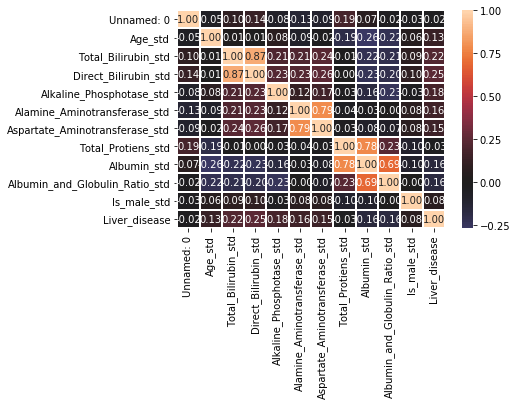

In [31]:
# Create the correlation matrix
corr = df.corr()

# Draw the heatmap
sns.heatmap(corr,   center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [32]:
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

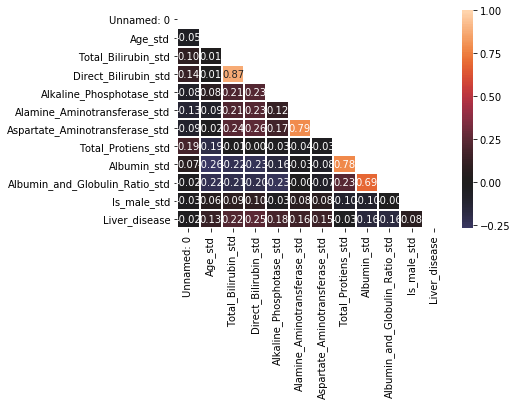

In [34]:
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [37]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.70)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.70)]

# Drop the features in the to_drop list
reduced_df = df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 9 columns.
